## ECE 695 : Inference and Learning and Generative Models Final Project

# Restricted Boltzman Machine

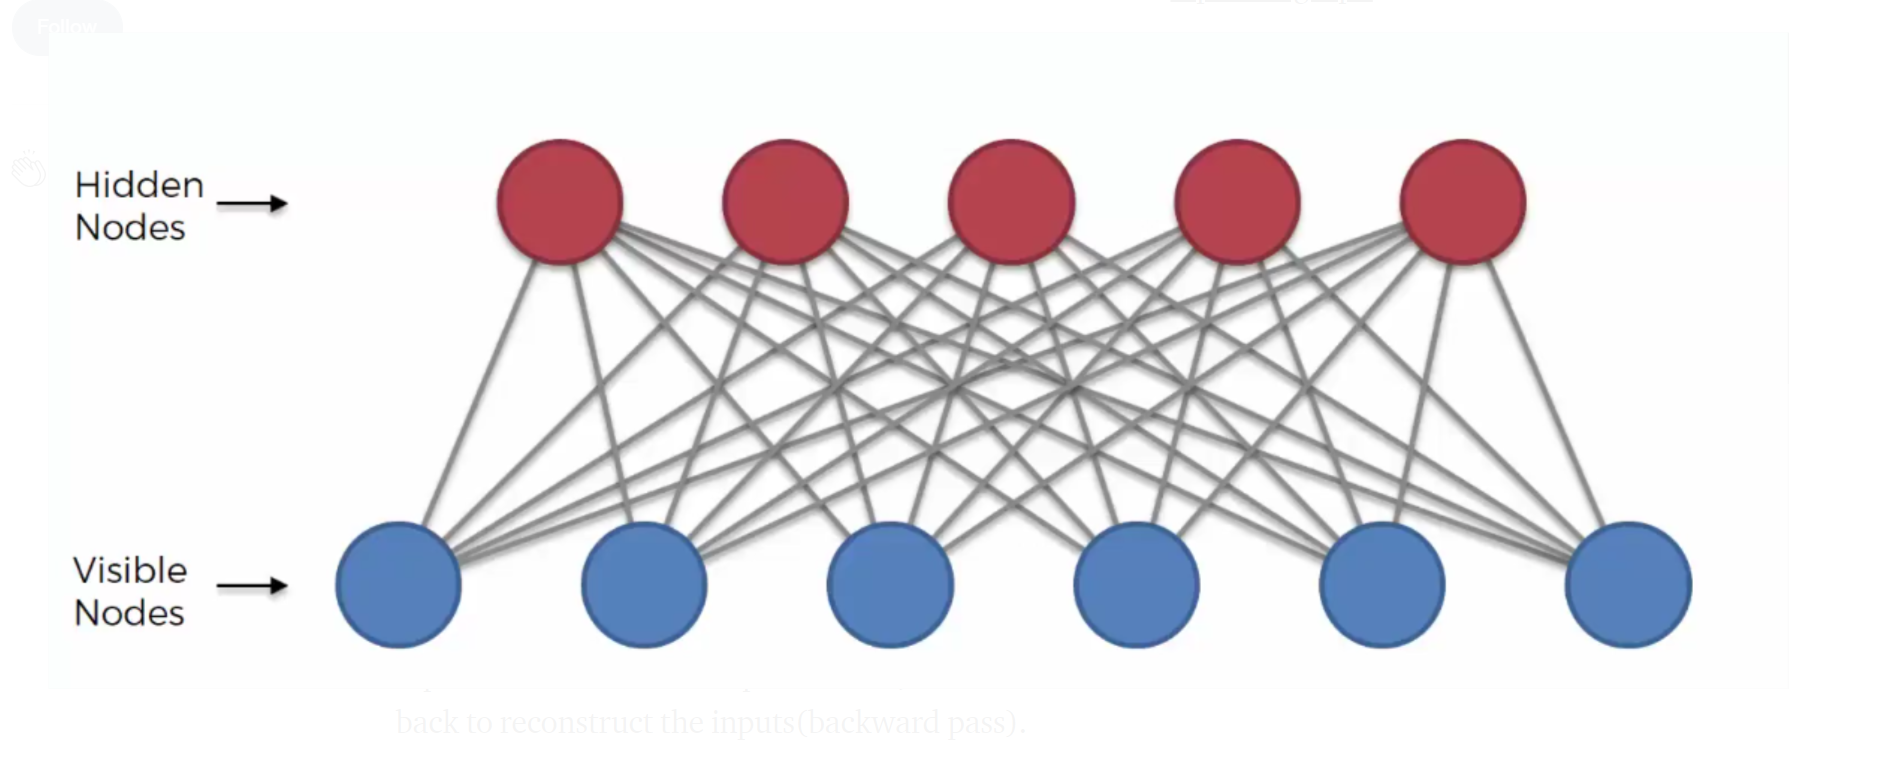

## README
1- loader code "loader.py" has been taken from https://github.com/basavin/rbm-smple and rest training part has been writtem from scratch.<br>
2- Reconstructed outputs are in directory "Output_\<num_epoch\>_\<KSTEP\>". Gradients XYTp0 and XYTpn are stored in "gradient_result_\<num_epoch\>" <br>
3- I tried with Fashion MNIST as I didn't see any significant difference with usual MNIST but learned representation was very bad. Fashion MNIST can be run by changing variable data_source <br>

## Imports

In [1]:
from loader import load_mnist, save_mnist_image
from time import time
import numpy as np
import os
import torchvision
from matplotlib import pyplot as plt
import sys
from numpy import sum as 𝚺
import pdb
from numpy.random import binomial as 𝕭ern
from numpy import exp as exp
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

## Define hyperparameters here

In [64]:
NX=100
η = 0.005
epochs = 20
n_examples=10000
batchsize = 100

#data_source="FASHION_MNIST"
data_source="MNIST"

## Load the dataset and initialize variables

In [65]:
# load data

if(data_source=="FASHION_MNIST"):
    data_loader = torchvision.datasets.FashionMNIST("fashion_mnist_data",download=True)
    dataset = data_loader.data.numpy()
    dataset=dataset.reshape(dataset.shape[0],-1)
    labels = data_loader.targets
elif(data_source=="MNIST"):
#     data_loader = torchvision.datasets.FashionMNIST("mnist_data",download=True)
#     dataset = data_loader.data.numpy()
#     dataset=dataset.reshape(dataset.shape[0],-1)
#     labels = data_loader.targets    
    dataset, labels = load_mnist(n_examples, training = True)

NY = dataset.shape[1]
num_examples = dataset.shape[0]
print("Number of visible units : {0}, Number of hidden units : {1}, NUmber of training data : {2}, Number of epochs : {3} ".format(NY,NX,num_examples,epochs))

Trying to open datafiles...
Loading 10000 examples from data/train-images-idx3-ubyte file...
Loading 10000 labels from data/train-labels-idx1-ubyte file...
Loading data completed.

Number of visible units : 784, Number of hidden units : 100, NUmber of training data : 10000, Number of epochs : 20 


# Utility Functions

In [66]:
def reconstruct(𝐲, 𝐖yx, 𝐛𝐲, 𝐛𝐱,KSTEP):

   NX = 𝐖yx.shape[0]
   q_𝐱_given_𝐲 = 1/(1+np.exp(-(𝐖yx @ y + bx)))
   𝐱= 𝕭ern(1,q_𝐱_given_𝐲)
   q_𝐱_given_𝐲n = 𝐱
   for K in range(KSTEP):
       q_𝐲_given_𝐱n = 1/(1+exp(-(𝐖yx.T @ q_𝐱_given_𝐲n + 𝐛𝐲)))
       q_𝐱_given_𝐲 = 1/(1+exp(-(𝐖yx   @  q_𝐲_given_𝐱n + 𝐛𝐱)))   
   
   return q_𝐲_given_𝐱n


def KL(p, q):
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)

    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

   $\Large \frac{\partial \mathcal{L}} {\partial \theta} = \langle \frac{\partial E}{\partial \theta} \rangle_{p^{0}}-\langle \frac{\partial E}{\partial \theta} \rangle_{p^{n}} - \frac{\partial p^{n}}{\partial \theta} \frac{\partial D_{KL}(p^{n}||p^{\infty})}{\partial p^n}$
   
 $\Large -E(\mathbf{X},\mathbf{Y},\theta) = {\mathbf{b_X}^T\mathbf{X}+\mathbf{b_Y}^T\mathbf{Y}+\mathbf{X}^T\mathbf{W}_{yx}\mathbf{Y}} $  
 
 
 $\Large \nabla_{\mathbf{W}_{yx}} \mathcal{L} =  \langle \mathbf{X}\mathbf{Y}^T \rangle_{p(y)q(x|y;\theta)}-\langle \mathbf{X}\mathbf{Y}^T \rangle_{q(x,y;\theta)}$
 
  
 $\Large \nabla_{\mathbf{b}_{\mathbf{X}}} \mathcal{L} =  \langle \mathbf{X} \rangle_{p(y)q(x|y;\theta)}-\langle \mathbf{X} \rangle_{q(x,y;\theta)}$
 
  
 $\Large \nabla_{\mathbf{b}_{\mathbf{Y}}} \mathcal{L} =  \langle \mathbf{Y} \rangle_{p(y)q(x|y;\theta)}-\langle \mathbf{Y} \rangle_{q(x,y;\theta)}$

## Main training

Running for 1-step divergence
Epoch 20 : Reconstruction error 340419.4019736155 
Total training time (sec): 21.51 

Running for 3-step divergence
Epoch 20 : Reconstruction error 394199.5712668841 
Total training time (sec): 91.90 

Running for 5-step divergence
Epoch 20 : Reconstruction error 439860.9342430729 
Total training time (sec): 223.41 

Running for 7-step divergence
Epoch 20 : Reconstruction error 470161.7727434519 
Total training time (sec): 462.56 



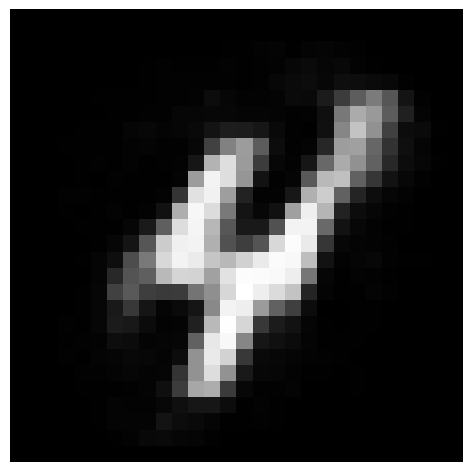

In [55]:
start_time = time()
batches = num_examples // batchsize
grad_sum_list=[]
error_per_epoch_list=[]
KL_div_list=[]
KSTEP_list=[1,3,5,7]    
L =len(KSTEP_list)


for KSTEP in KSTEP_list:
    print("Running for {0}-step divergence".format(KSTEP))
    𝐖yx = 0.1 * np.random.randn(NX,NY)
    𝐛𝐲 = np.zeros((NY,1))
    𝐛𝐱 = -4.0 * np.ones(( NX,1))
    Δ𝐖 = np.zeros((NX,NY))
    Δ𝐛𝐲 = np.zeros((NY,1))
    Δ𝐛𝐱 = np.zeros((NX,1))   
    PD_list=[]
    ND_list=[]
    for epoch in range(epochs):
        error_per_epoch=0
        grad_sum = 0
        PD_per_batch_list=[]
        ND_per_batch_list =[]
        for batch in range(batches):
            #### --- Positive phase of contrastive divergence --- ####
            # get next batch of data
            𝐲 = dataset[int(batch*batchsize):int((batch+1)*batchsize)].T

            q_𝐱ǂ𝐲 = 1/(1+exp(-(𝐖yx @ 𝐲 + 𝐛𝐱)))
            # sample the states of hidden units based on prob_h0
            𝐱 =  𝕭ern(1,q_𝐱ǂ𝐲)

            # positive phase products
            𝐱𝐲ᵀP0 =  q_𝐱ǂ𝐲 @ 𝐲.T

            # activation values needed to update biases       
            𝐱ᵀp0 = Σ(𝐱,axis=1,keepdims=True)
            𝐲ᵀp0 = Σ(𝐲, axis=1,keepdims=True)
            #### --- Calculating expectations XY^T X and Y under model distribtuion --- ####
            ######## K step Contrastive divergence #################
            q_𝐱ǂ𝐲n = 𝐱
            for K in range(KSTEP):
                q_𝐲ǂ𝐱n = 1/(1+exp(-(𝐖yx.T @ q_𝐱ǂ𝐲n + 𝐛𝐲)))
                q_𝐱ǂ𝐲n = 1/(1+exp(-(𝐖yx   @  q_𝐲ǂ𝐱n + 𝐛𝐱)))
                𝐱 =  𝕭ern(1,q_𝐱ǂ𝐲n)
                #𝐲 = 𝕭ern(1,q_𝐲ǂ𝐱n)

            𝐱𝐲ᵀPn = 𝐱 @ q_𝐲ǂ𝐱n.T
            𝐱ᵀpn = 𝚺(q_𝐱ǂ𝐲n,axis=1,keepdims=True)
            𝐲ᵀpn = 𝚺(q_𝐲ǂ𝐱n, axis=1,keepdims=True)   

            m = 0.5 if epoch > 5 else 0.9
            ######## Updating weights ######################################
            PD_per_batch_list.append(𝐱𝐲ᵀP0)
            ND_per_batch_list.append(𝐱𝐲ᵀPn)

            Δ𝐖 =  Δ𝐖*m  +(η/batchsize) * (𝐱𝐲ᵀP0 - 𝐱𝐲ᵀPn)
            Δ𝐛𝐲 = Δ𝐛𝐲*m +(η/batchsize) * (𝐲ᵀp0 - 𝐲ᵀpn)
            Δ𝐛𝐱 = Δ𝐛𝐱*m +(η/batchsize) * (𝐱ᵀp0 - 𝐱ᵀpn)     

            𝐖yx+=Δ𝐖
            𝐛𝐲+=Δ𝐛𝐲
            𝐛𝐱+=Δ𝐛𝐱
            ##################################################################
            error_per_epoch += Σ((𝐲 - q_𝐲ǂ𝐱n) ** 2)
            #############################################################        
        
            grad_sum += Σ(𝐱𝐲ᵀP0 - 𝐱𝐲ᵀPn)
      
        error_per_epoch_list.append(error_per_epoch)
        PD_list.append(np.mean(np.array(PD_per_batch_list),0))
        ND_list.append(np.mean(np.array(ND_per_batch_list),0))
        grad_sum_list.append(grad_sum)
      
    
    print("Epoch {0} : Reconstruction error {1} ".format(epoch + 1,error_per_epoch))

    print ("Total training time (sec): %0.2f \n" % (time() - start_time))    


    for i in range(10):
        data = dataset[i][:,np.newaxis]
        save_mnist_image(data, "Output_{1}_{0}".format(KSTEP,epochs), str(i) + "original_{0}-STEP.png".format(KSTEP))
        data = reconstruct(data, 𝐖yx, 𝐛𝐲, 𝐛𝐱,KSTEP)
        save_mnist_image(data, "Output_{1}_{0}".format(KSTEP,epochs), str(i) + "reconstructed_{0}-STEP.png".format(KSTEP))


    PD_list = np.array([np.ravel(item) for item in PD_list])
    ND_list = np.array([np.ravel(item) for item in ND_list])


    for i in range(len(PD_list)):
        KL_div_list.append(KL(np.histogram(PD_list[i])[0],np.histogram(ND_list[i])[0]))

    # Saving plots of flattened version of XY^T under p0 and XY^T under pn
    f, axes = plt.subplots(L, 2, sharex=True, sharey="col")
    for i in [0,4,19]:  
        directory = "gradient_result_{0}".format(epochs)
        if not os.path.exists(directory):
            os.makedirs(directory)        
        
        axes[0].plot(PD_list[i])
        axes[0].set_title("KSTEP={0}".format(KSTEP))
        axes[0].set_xlabel("DKL (XYTp0 ||XYTPn ) for KSTEP ={0}".format(KSTEP))
        axes[1].plot(ND_list[i]) 
        axes[1].set_title("KSTEP={0}".format(KSTEP))
        axes[1].set_xlabel("DKL (XYTp0 ||XYTPn ) for KSTEP ={0}".format(KSTEP))
        plt.savefig("{0}/KSTEP_{1}_epoch_{2}_divergence_PN.png".format(directory,KSTEP,i))
        plt.close()




### As expected we can see above resconstruction error increasing because in reconstruction error we would be sampling K times in case of KSTEP divergence

### KL Divergence plot with epochs between positive divergence XYTp0 and negative divergence XYTpn

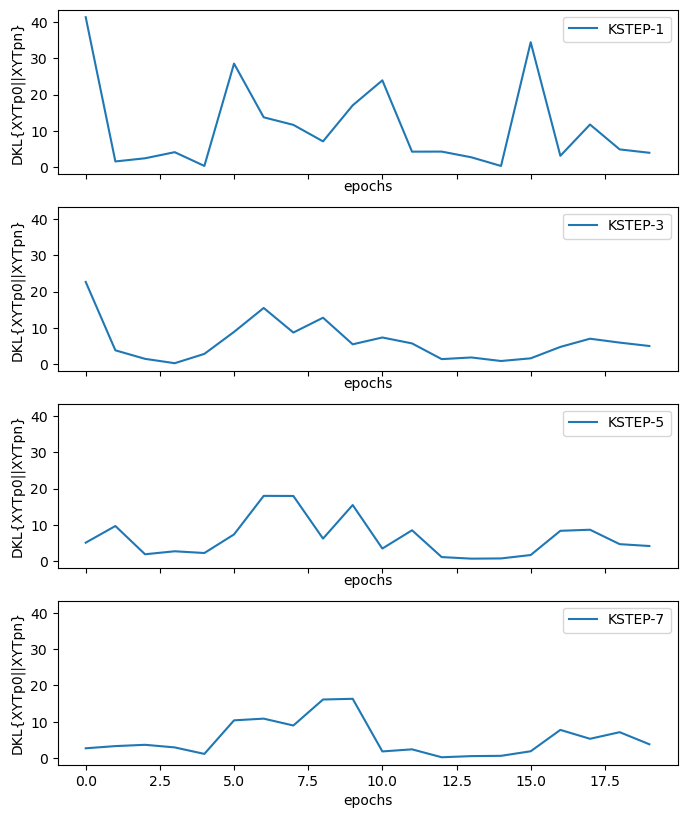

In [62]:
KL_div_list=np.reshape(np.array(KL_div_list),(epochs,L)).T
f, axes = plt.subplots(L, 1, sharex='col', sharey=True, figsize=(8, 10))
for i in range(L):
    #plt.subplot(L,1,i+1,sharey=True)
    axes[i].plot(KL_div_list[i],label="KSTEP-{0}".format(KSTEP_list[i]))
    axes[i].legend()
    axes[i].set_xlabel("epochs")
    axes[i].set_ylabel("DKL{XYTp0||XYTpn}")